In [35]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [3]:
df_train = pd.read_csv("data_train.csv")
df_train

,Ball_Possession_Home_local,Ball_Possession_Away_visitante,Shots_on_Goal_Home_local,Shots_on_Goal_Away_visitante,Fouls_Home_local,Fouls_Away_visitante,Yellow_Cards_Home_local,Yellow_Cards_Away_visitante,Red_Cards_Home_local,Red_Cards_Away_visitante,...,expected_goals_xg_away_visitante,Goalkeeper_Saves_Home_local,Goalkeeper_Saves_Away_visitante,Offsides_Home_local,Offsides_Away_visitante,Total_Passes_Home_local,Total_Passes_Away_visitante,save_ratio_home_local,save_ratio_away_visitante,resultado
0,51.0,49.0,8.0,0.0,8.0,11.0,0.0,0.0,0.0,0.0,...,0.51,0.0,3.0,1.0,0.0,456.0,432.0,0.000000,0.375000,0
1,41.0,59.0,5.0,4.0,15.0,16.0,4.0,4.0,0.0,0.0,...,1.56,3.0,3.0,0.0,6.0,283.0,427.0,0.750000,0.600000,0
2,34.0,66.0,4.0,3.0,12.0,8.0,4.0,0.0,0.0,0.0,...,0.60,3.0,3.0,3.0,0.0,323.0,635.0,1.000000,0.750000,0
3,65.0,35.0,5.0,4.0,9.0,11.0,0.0,0.0,0.0,0.0,...,1.50,3.0,4.0,2.0,1.0,593.0,329.0,0.750000,0.800000,1
4,66.0,34.0,3.0,4.0,9.0,13.0,0.0,2.0,0.0,0.0,...,0.46,3.0,2.0,2.0,2.0,538.0,276.0,0.750000,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8895,71.0,29.0,12.0,3.0,11.0,12.0,2.0,2.0,0.0,0.0,...,1.26,2.0,8.0,2.0,3.0,605.0,234.0,0.666667,0.666667,0
8896,41.0,59.0,9.0,2.0,12.0,6.0,0.0,2.0,0.0,0.0,...,1.56,1.0,9.0,6.0,3.0,366.0,556.0,0.500000,1.000000,2
8897,33.0,67.0,1.0,8.0,18.0,11.0,3.0,0.0,0.0,0.0,...,1.58,7.0,1.0,2.0,2.0,262.0,562.0,0.875000,1.000000,2
8898,79.0,21.0,7.0,2.0,12.0,12.0,2.0,2.0,0.0,0.0,...,1.12,1.0,5.0,2.0,1.0,769.0,200.0,0.500000,0.714286,0


In [4]:
df_test_model = pd.read_csv("data_test.csv")
df_test_model

,resultado,Ball_Possession_Home_local,Shots_on_Goal_Home_local,Fouls_Home_local,Yellow_Cards_Home_local,Red_Cards_Home_local,expected_goals_xg_home_local,Goalkeeper_Saves_Home_local,Offsides_Home_local,Total_Passes_Home_local,...,Ball_Possession_Away_visitante,Shots_on_Goal_Away_visitante,Fouls_Away_visitante,Yellow_Cards_Away_visitante,Red_Cards_Away_visitante,expected_goals_xg_away_visitante,Goalkeeper_Saves_Away_visitante,Offsides_Away_visitante,Total_Passes_Away_visitante,save_ratio_away_visitante
0,0,59.552573,6.000000,4.487696,0.664430,0.029083,2.389933,2.760626,0.970917,546.713647,...,39.666667,3.000000,13.111111,2.666667,0.000000,1.013333,4.111111,2.222222,355.666667,0.674868
1,2,45.770833,4.625000,9.604167,1.666667,0.083333,1.503333,2.979167,1.708333,392.125000,...,48.000000,5.100000,10.000000,2.300000,0.000000,1.420000,4.700000,1.800000,437.900000,0.676429
2,2,52.822581,4.419355,11.024194,1.701613,0.048387,1.865242,2.508065,2.016129,482.040323,...,46.800000,4.600000,11.900000,2.400000,0.000000,1.338000,4.300000,1.800000,447.500000,0.644643
3,2,43.592593,3.654321,9.098765,1.419753,0.006173,1.089630,3.092593,2.277778,370.561728,...,44.222222,4.555556,11.777778,2.222222,0.000000,1.282222,2.444444,1.555556,399.222222,0.576455
4,0,60.128668,5.975169,4.600451,0.683973,0.022573,1.923747,2.616253,0.984199,591.882619,...,41.800000,4.200000,14.200000,2.400000,0.100000,1.496000,4.000000,2.100000,350.400000,0.677778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0,50.221154,4.060897,2.875000,0.480769,0.016026,1.265545,2.788462,0.583333,467.035256,...,56.200000,6.100000,10.400000,1.200000,0.000000,1.908000,1.300000,2.000000,560.600000,0.616667
185,0,57.404063,5.934537,4.832957,0.731377,0.015801,1.683747,2.636569,0.866817,545.176072,...,41.800000,4.200000,14.200000,2.400000,0.100000,1.496000,4.000000,2.100000,350.400000,0.677778
186,0,38.785714,3.678571,11.642857,2.392857,0.071429,1.117500,2.785714,1.928571,342.821429,...,46.800000,4.600000,11.900000,2.400000,0.000000,1.338000,4.300000,1.800000,447.500000,0.644643
187,0,48.162371,4.090206,4.005155,0.677835,0.025773,1.571933,2.757732,0.551546,415.368557,...,41.700000,4.300000,12.600000,2.500000,0.500000,1.000000,5.600000,2.200000,367.500000,0.662112


In [5]:
X_test = df_test_model.drop(columns=['resultado'])
y_test = df_test_model['resultado']
X_train = df_train.drop(columns=['resultado'])
y_train = df_train['resultado']


In [6]:
X_test = df_test_model[X_train.columns]

### XGBoost restrictivo

In [25]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0.5, 1],
    'min_child_weight': [5, 7, 10],
}

grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=xgb_params,
                           scoring='f1_macro',
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

# Guardar el mejor modelo
mejor_xgb = grid_search.best_estimator_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


c:\Users\fer_r\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:35:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [16]:
# Mejor modelo encontrado
mejor_xg = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.8}


In [17]:
# Evaluación en entrenamiento
y_train_pred = mejor_xgb.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train F1 Score (macro):", f1_score(y_train, y_train_pred, average='macro'))
print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

Train Accuracy: 0.9805617977528089
Train F1 Score (macro): 0.9783303103611306

Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4092
           1       0.97      0.96      0.96      2204
           2       0.98      0.99      0.98      2604

    accuracy                           0.98      8900
   macro avg       0.98      0.98      0.98      8900
weighted avg       0.98      0.98      0.98      8900



In [18]:
# Evaluación en test
y_pred = mejor_xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Multiclase
y_proba_test = mejor_xgb.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, y_proba_test, multi_class='ovr')
print("ROC AUC Score (One-vs-Rest):", roc_auc)


Accuracy: 0.49206349206349204
F1 Score (macro): 0.48531139835487663

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.52      0.61        86
           1       0.29      0.59      0.39        46
           2       0.60      0.37      0.46        57

    accuracy                           0.49       189
   macro avg       0.54      0.49      0.49       189
weighted avg       0.58      0.49      0.51       189

ROC AUC Score (One-vs-Rest): 0.7170093538266848


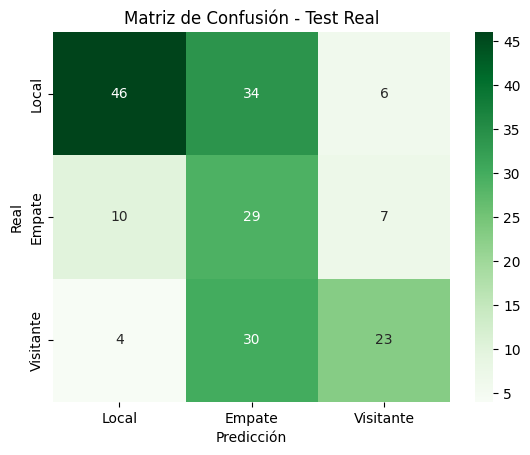

In [26]:
# Matriz de confusión
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=['Local', 'Empate', 'Visitante'], yticklabels=['Local', 'Empate', 'Visitante'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Test Real')
plt.show()

#### XGBoost Flexible

In [19]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

xgb_params = {
    'n_estimators': [300, 400, 500],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.5, 1],
    'min_child_weight': [1,3,5]
}

grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=xgb_params,
                           scoring='f1_macro',
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

# Guardar el mejor modelo
mejor_xgb = grid_search.best_estimator_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Users\fer_r\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:08:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [21]:
# Mejor modelo encontrado
mejor_xg = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'colsample_bytree': 1, 'gamma': 0.5, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.8}


In [22]:
# Evaluación en entrenamiento
y_train_pred = mejor_xgb.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train F1 Score (macro):", f1_score(y_train, y_train_pred, average='macro'))
print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

Train Accuracy: 0.9891011235955056
Train F1 Score (macro): 0.9879945863156593

Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4092
           1       0.98      0.98      0.98      2204
           2       0.99      0.99      0.99      2604

    accuracy                           0.99      8900
   macro avg       0.99      0.99      0.99      8900
weighted avg       0.99      0.99      0.99      8900



In [23]:
# Evaluación en test
y_pred = mejor_xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Multiclase
y_proba_test = mejor_xgb.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, y_proba_test, multi_class='ovr')
print("ROC AUC Score (One-vs-Rest):", roc_auc)


Accuracy: 0.5185185185185185
F1 Score (macro): 0.5140089430885694

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.53      0.63        86
           1       0.31      0.63      0.42        46
           2       0.64      0.40      0.49        57

    accuracy                           0.52       189
   macro avg       0.57      0.52      0.51       189
weighted avg       0.62      0.52      0.54       189

ROC AUC Score (One-vs-Rest): 0.7268271075646586


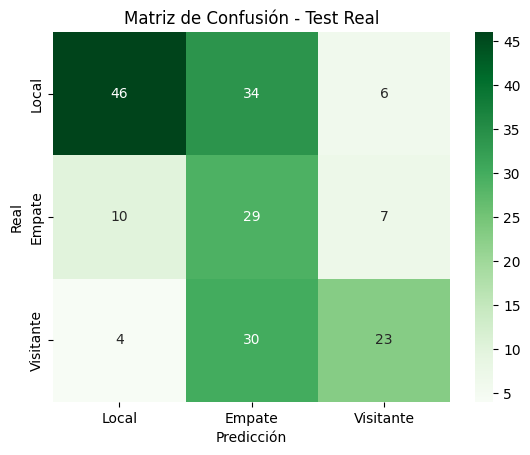

In [24]:
# Matriz de confusión
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=['Local', 'Empate', 'Visitante'], yticklabels=['Local', 'Empate', 'Visitante'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Test Real')
plt.show()

### Eliminar columnas

In [27]:
# Eliminar features del dataframe original
features_to_remove = [
    'save_ratio_away_visitante',
    'save_ratio_home_local',
    'Shots_on_Goal_Home_local',
    'Goalkeeper_Saves_Away_visitante'
]

df_train = df_train.drop(columns=features_to_remove)
df_test_model = df_test_model.drop(columns=features_to_remove)


In [28]:
X_test = df_test_model.drop(columns=['resultado'])
y_test = df_test_model['resultado']
X_train = df_train.drop(columns=['resultado'])
y_train = df_train['resultado']

In [29]:
X_test = df_test_model[X_train.columns]

In [30]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

xgb_params = {
    'n_estimators': [300, 400, 500],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.5, 1],
    'min_child_weight': [1,3,5]
}

grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=xgb_params,
                           scoring='f1_macro',
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

# Guardar el mejor modelo
mejor_xgb = grid_search.best_estimator_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Users\fer_r\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:16:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [31]:
# Mejor modelo encontrado
mejor_xg = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 0.8}


In [32]:
# Evaluación en entrenamiento
y_train_pred = mejor_xgb.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train F1 Score (macro):", f1_score(y_train, y_train_pred, average='macro'))
print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

Train Accuracy: 0.8246067415730337
Train F1 Score (macro): 0.8034695305160234

Train Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4092
           1       0.82      0.59      0.69      2204
           2       0.85      0.88      0.86      2604

    accuracy                           0.82      8900
   macro avg       0.83      0.79      0.80      8900
weighted avg       0.82      0.82      0.82      8900



In [33]:
# Evaluación en test
y_pred = mejor_xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Multiclase
y_proba_test = mejor_xgb.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, y_proba_test, multi_class='ovr')
print("ROC AUC Score (One-vs-Rest):", roc_auc)


Accuracy: 0.41798941798941797
F1 Score (macro): 0.350506218251883

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        86
           1       0.33      0.07      0.11        46
           2       0.34      0.70      0.46        57

    accuracy                           0.42       189
   macro avg       0.41      0.40      0.35       189
weighted avg       0.44      0.42      0.38       189

ROC AUC Score (One-vs-Rest): 0.6209626186538807


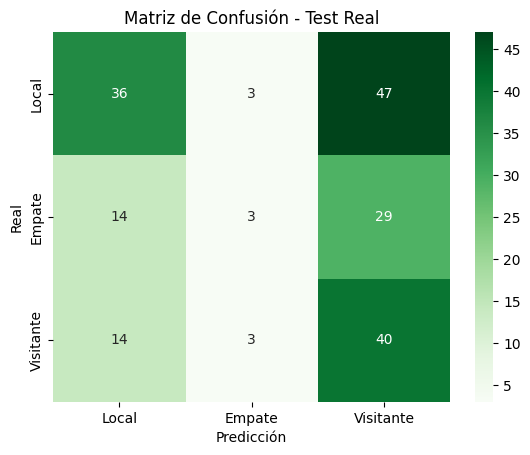

In [34]:
# Matriz de confusión
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=['Local', 'Empate', 'Visitante'], yticklabels=['Local', 'Empate', 'Visitante'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Test Real')
plt.show()

### Escalamos variables

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

xgb_params = {
    'n_estimators': [300, 400, 500],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.5, 1],
    'min_child_weight': [1,3,5]
}

grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=xgb_params,
                           scoring='f1_macro',
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train_scaled, y_train)

# Guardar el mejor modelo
mejor_xgb = grid_search.best_estimator_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Users\fer_r\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:53:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [42]:
# Mejor modelo encontrado
mejor_xg = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 0.8}


In [43]:
# Evaluación en entrenamiento
y_train_pred = mejor_xgb.predict(X_train_scaled)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train F1 Score (macro):", f1_score(y_train, y_train_pred, average='macro'))
print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

Train Accuracy: 0.8246067415730337
Train F1 Score (macro): 0.8034695305160234

Train Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4092
           1       0.82      0.59      0.69      2204
           2       0.85      0.88      0.86      2604

    accuracy                           0.82      8900
   macro avg       0.83      0.79      0.80      8900
weighted avg       0.82      0.82      0.82      8900



In [44]:
# Evaluación en test
y_pred = mejor_xgb.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Multiclase
y_proba_test = mejor_xgb.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, y_proba_test, multi_class='ovr')
print("ROC AUC Score (One-vs-Rest):", roc_auc)


Accuracy: 0.41798941798941797
F1 Score (macro): 0.350506218251883

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        86
           1       0.33      0.07      0.11        46
           2       0.34      0.70      0.46        57

    accuracy                           0.42       189
   macro avg       0.41      0.40      0.35       189
weighted avg       0.44      0.42      0.38       189

ROC AUC Score (One-vs-Rest): 0.588349715777869


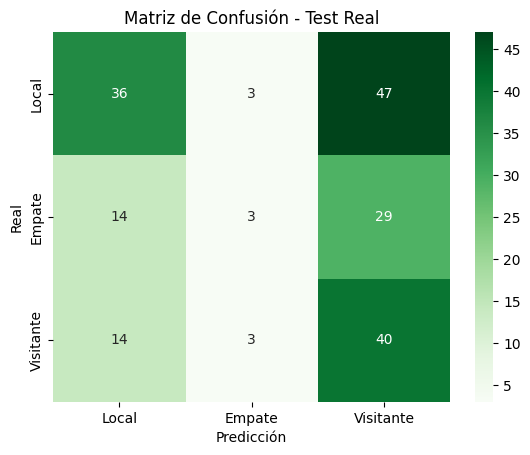

In [45]:
# Matriz de confusión
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=['Local', 'Empate', 'Visitante'], yticklabels=['Local', 'Empate', 'Visitante'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Test Real')
plt.show()